# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [35]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [36]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [38]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

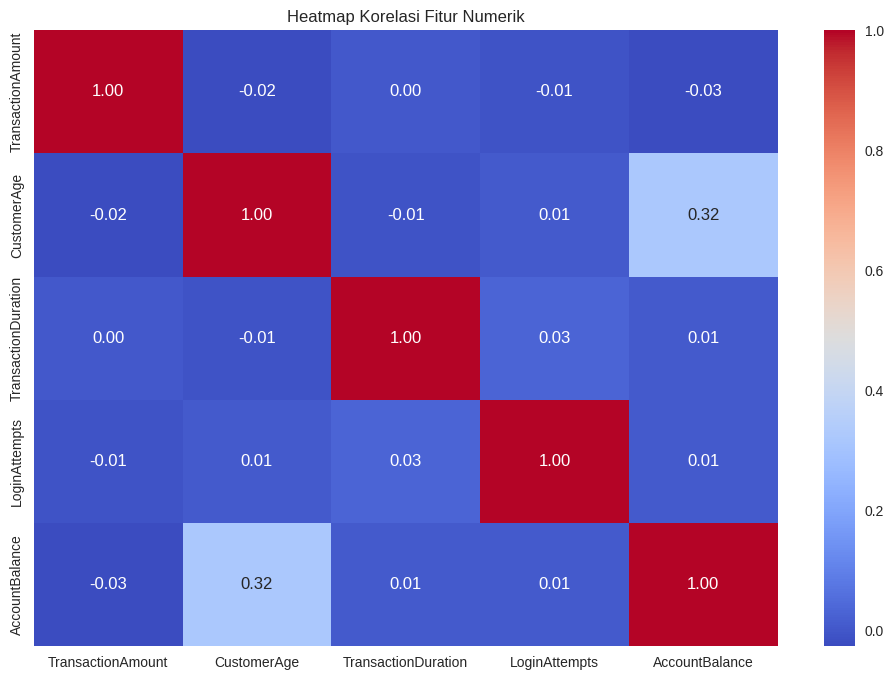

In [39]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

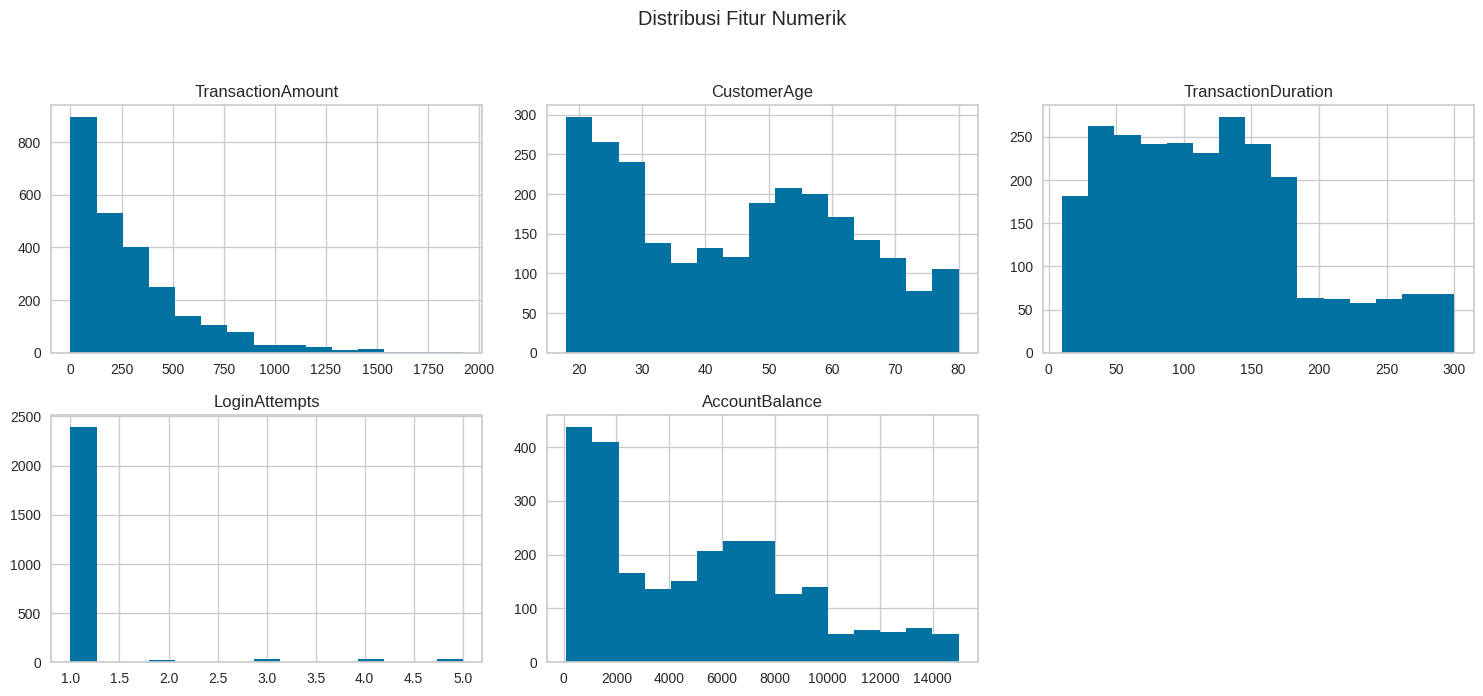

In [40]:
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [41]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [42]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [43]:
print(f'Jumlah baris duplikat: {df.duplicated().sum()}')

Jumlah baris duplikat: 21


In [44]:
df.drop_duplicates(inplace=True)
print(f'Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}')

Jumlah baris duplikat setelah dihapus: 0


In [45]:
# Hapus kolom ID dan kolom dengan kardinalitas tinggi atau tidak relevan untuk clustering
# Juga hapus kolom tanggal karena memerlukan feature engineering yang lebih kompleks
cols_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
4,13.45,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40


In [46]:
# Berdasarkan df.info(), beberapa kolom memiliki missing values.
# Untuk kolom numerik, kita bisa isi dengan median. Untuk kategorikal dengan modus.
for col in ['CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Cek kembali missing values
df.isnull().sum()

,0
TransactionAmount,26
TransactionType,30
Location,30
Channel,27
CustomerAge,0
CustomerOccupation,23
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [50]:
categorical_cols_updated = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols_updated:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
4,13.45,0,1,2,45.0,3,198.0,1.0,7429.40


In [51]:
# Simpan data sebelum scaling untuk interpretasi nanti
df_unscaled = df.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970013,0.484967,1.187200,-1.217244,1.428218,-1.331113,-0.552689,-0.204629,-0.000315
1,0.268442,0.484967,-0.507526,-1.217244,1.315549,-1.331113,0.309241,-0.204629,2.230516
2,-0.586320,0.484967,0.138084,1.191396,-1.444831,1.277883,-0.911827,-0.204629,-1.029691
3,-0.387257,0.484967,0.945096,1.191396,-1.050491,1.277883,-1.357157,-0.204629,0.891545
4,-0.972202,-1.804294,-1.637343,1.191396,0.019860,1.277883,1.128074,-0.204629,0.597515


In [52]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [53]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [54]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

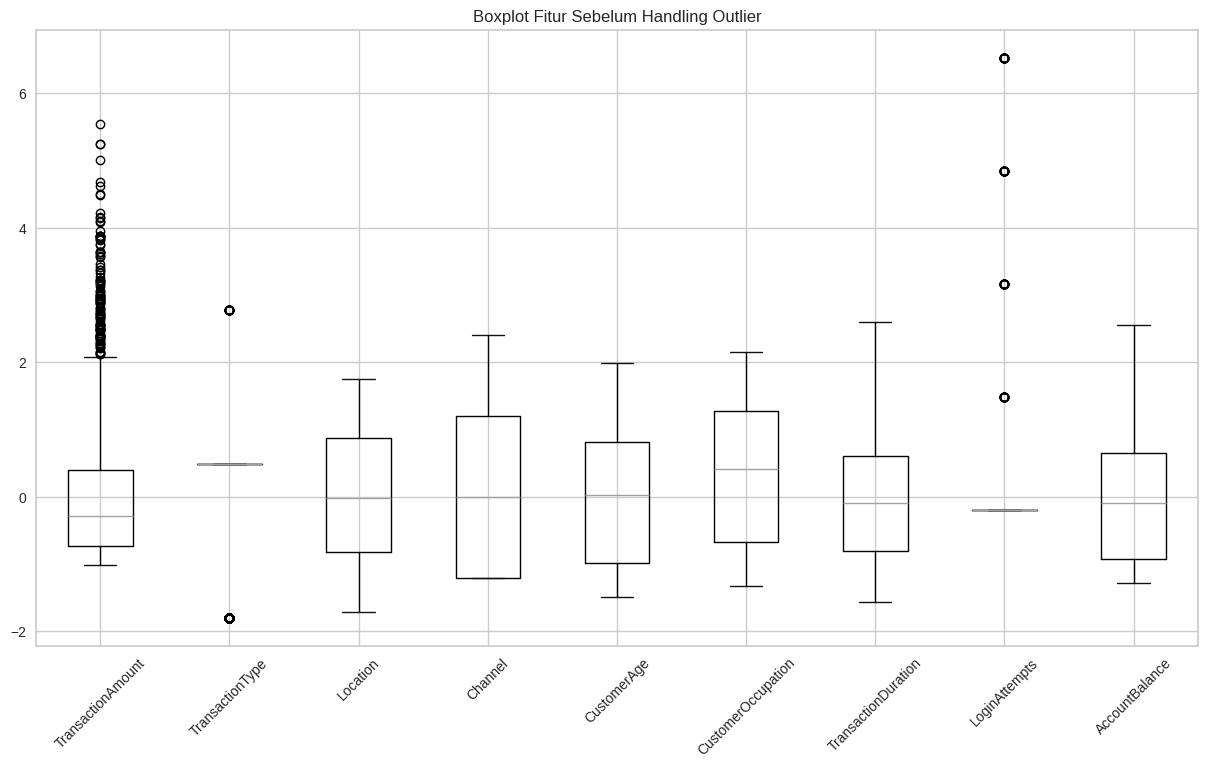

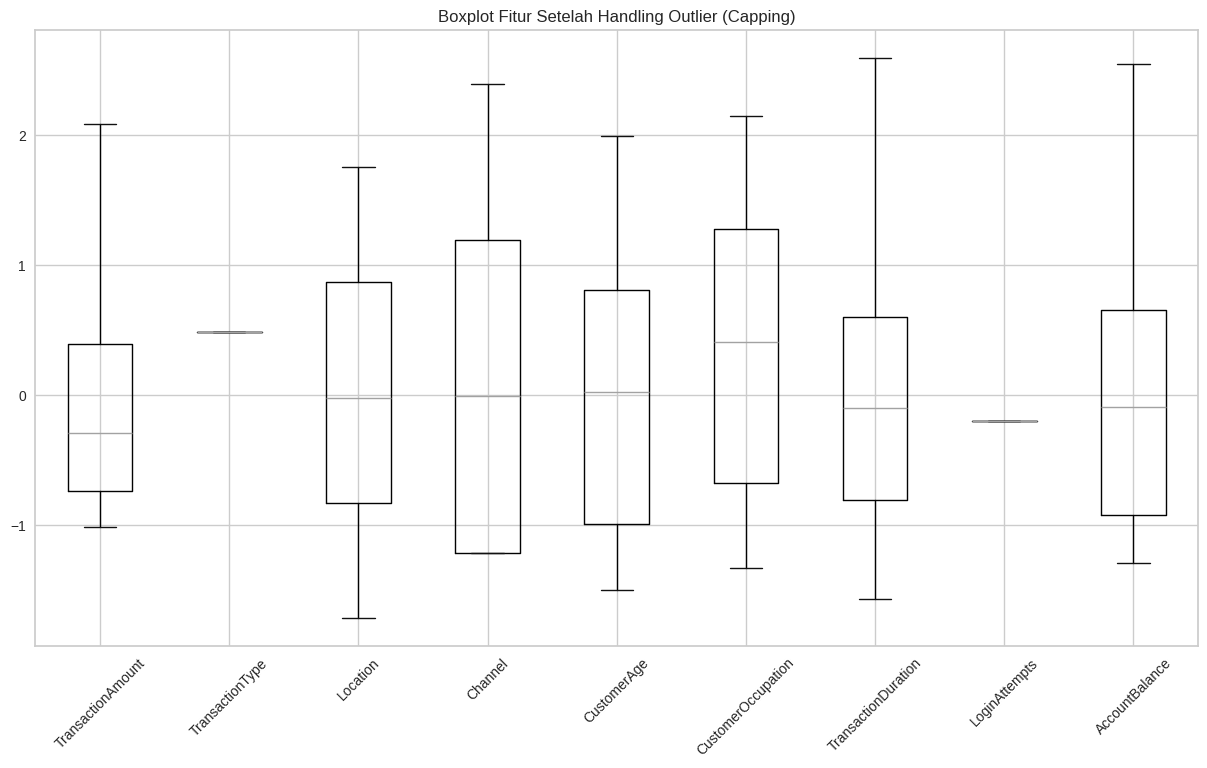

In [55]:
# Visualisasi boxplot sebelum handling outlier
plt.figure(figsize=(15, 8))
df_scaled.boxplot()
plt.title('Boxplot Fitur Sebelum Handling Outlier')
plt.xticks(rotation=45)
plt.show()

# Handling outlier dengan metode IQR capping
for col in df_scaled.columns:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_scaled[col] = np.clip(df_scaled[col], lower_bound, upper_bound)

# Visualisasi boxplot setelah handling outlier
plt.figure(figsize=(15, 8))
df_scaled.boxplot()
plt.title('Boxplot Fitur Setelah Handling Outlier (Capping)')
plt.xticks(rotation=45)
plt.show()

In [56]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [57]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2490.00000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.00000,2516.000000,2516.000000
mean,297.74190,0.788156,21.288951,1.010731,44.647456,1.530604,119.47337,1.121622,5113.432234
std,292.47931,0.436909,12.393850,0.830509,17.754705,1.150096,69.62507,0.594469,3876.768857
min,0.26000,0.000000,0.000000,0.000000,18.000000,0.000000,10.00000,1.000000,101.250000
25%,81.39000,1.000000,11.000000,0.000000,27.000000,0.750000,63.00000,1.000000,1519.372500
50%,211.36000,1.000000,21.000000,1.000000,45.000000,2.000000,112.50000,1.000000,4737.840000
75%,411.67000,1.000000,32.000000,2.000000,59.000000,3.000000,161.00000,1.000000,7640.990000
max,1919.11000,2.000000,43.000000,3.000000,80.000000,4.000000,300.00000,5.000000,14977.990000


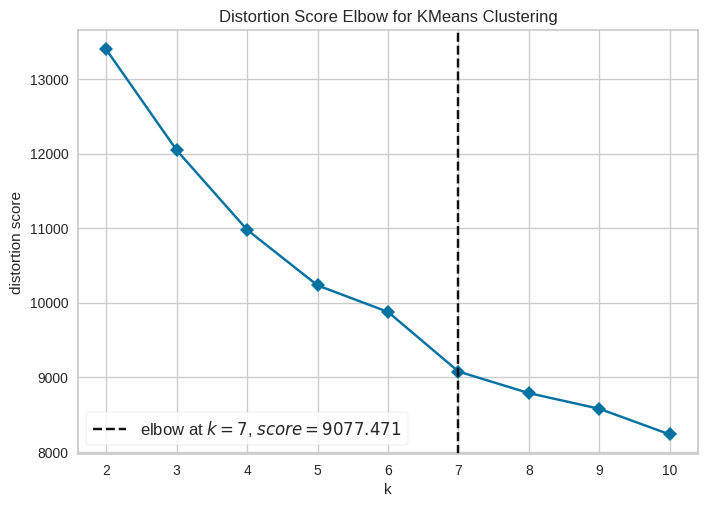

Jumlah cluster optimal adalah: 7


In [58]:
# Menggunakan KElbowVisualizer untuk menemukan k optimal
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False)

# Handle remaining missing values in df_scaled
df_scaled.fillna(df_scaled.median(), inplace=True)

visualizer.fit(df_scaled)
visualizer.show()
optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster optimal adalah: {optimal_k}")

In [59]:
# Membangun model K-Means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

KMeans(n_clusters=np.int64(7), n_init=10, random_state=42)

In [60]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans, 'model_clustering.h5')

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [61]:
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, labels)

print(f'Untuk n_clusters = {optimal_k}, Silhouette Score adalah: {silhouette_avg:.4f}')

Untuk n_clusters = 7, Silhouette Score adalah: 0.1473


In [63]:
# Menambahkan label cluster ke dataframe yang belum di-scaling
df_unscaled['Target'] = labels

# Menganalisis karakteristik setiap cluster
cluster_characteristics = df_unscaled.groupby('Target').mean()
cluster_characteristics

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
Target,,,,,,,,,
0,305.804045,0.914005,21.749386,0.000000,54.840295,1.316953,98.772727,1.120393,4654.860835
1,288.694392,0.813230,20.821012,0.887160,48.712062,0.856031,242.147860,1.163424,6695.734747
2,252.761294,0.723881,9.791045,1.569652,55.544776,1.385572,102.298507,1.097015,5026.436965
3,338.139711,0.824841,9.815287,1.015924,23.401274,2.984076,122.654459,1.178344,1520.326720
4,322.510855,0.701799,32.786632,1.586118,53.655527,1.303342,99.650386,1.138817,4501.793111
5,289.051304,0.775862,31.591954,0.982759,23.198276,3.017241,117.343391,1.066092,1630.046753
6,291.818030,0.774436,21.538847,1.017544,47.298246,0.110276,97.557644,1.107769,11111.777619


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Silhouette Score dengan PCA: 0.3846


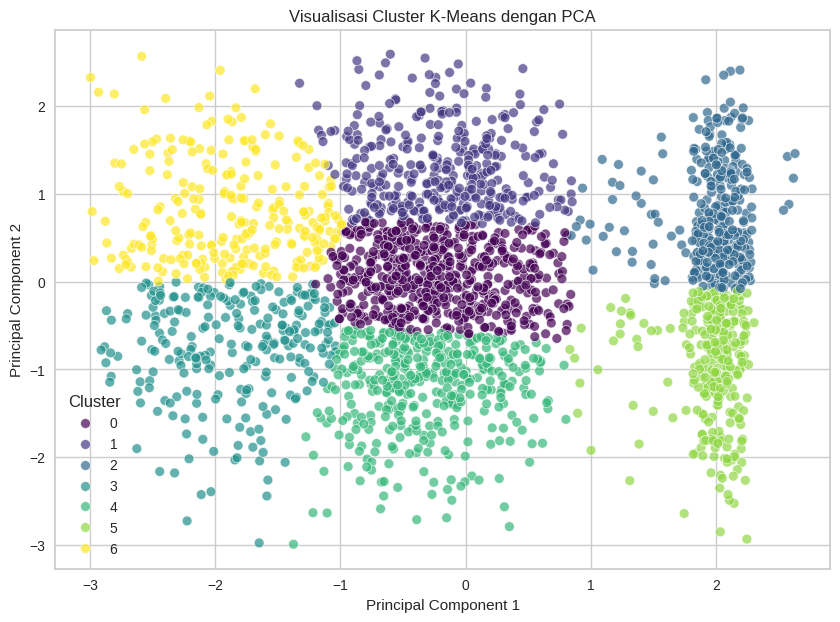

In [64]:
# Menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Membuat model KMeans pada data PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca.fit(df_pca)

# Evaluasi model PCA
labels_pca = kmeans_pca.labels_
silhouette_pca = silhouette_score(df_pca, labels_pca)
print(f'Silhouette Score dengan PCA: {silhouette_pca:.4f}')

# Visualisasi cluster PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Cluster K-Means dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [65]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans, 'PCA_model_clustering.h5')

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

In [80]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df_scaled['Target'] = labels

cluster_summary = df_scaled.groupby('Target').agg(['mean', 'min', 'max'])

print("Tabel Agregasi Lengkap per Cluster:")
print(cluster_summary)
print("\n")

print("Jumlah data per cluster:")
print(df_scaled['Target'].value_counts().sort_index())

print("\nKolom-kolom yang tersedia:")
print(df_scaled.columns.tolist())


Tabel Agregasi Lengkap per Cluster:
       TransactionAmount                     TransactionType                      Location                       Channel                     CustomerAge                     CustomerOccupation                     TransactionDuration                     LoginAttempts                     AccountBalance                    
                    mean       min       max            mean       min       max      mean       min       max      mean       min       max        mean       min       max               mean       min       max                mean       min       max          mean       min       max           mean       min       max
Target                                                                                                                                                                                                                                                                                                                          
0

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

##Cluster 0: Pelanggan Konvensional Usia Matang
- Rata-rata Channel : -1.22
- Rata-rata CustomerAge : 0.57
- Analisis: Cluster ini memiliki nilai Channel yang sangat negatif, menunjukkan preferensi kuat pada satu jenis channel yang nilainya di-encode rendah. Selain itu, rata-rata usia mereka (CustomerAge) berada di atas rata-rata populasi. Ini mengindikasikan segmen pelanggan yang lebih tua atau matang namun sudah sangat terbiasa dan lebih memilih bertransaksi melalui channel digital.

##Cluster 1: Pelanggan dengan Transaksi Berdurasi Panjang
- Rata-rata TransactionDuration : 1.76
- Rata-rata AccountBalance : 0.41
- Analisis: Ciri paling menonjol dari cluster ini adalah durasi transaksi (TransactionDuration) yang jauh di atas rata-rata. Ini bisa berarti mereka melakukan transaksi yang lebih kompleks atau memerlukan waktu lebih lama untuk menyelesaikannya. Saldo rekening (AccountBalance) mereka juga sedikit di atas rata-rata, menunjukkan kapasitas finansial yang baik.

##Cluster 2: Pelanggan Konvensional dari Lokasi Spesifik
- Rata-rata Location : -0.93
- Rata-rata Channel : 0.67
- Analisis: Cluster ini didefinisikan oleh kombinasi lokasi dan channel. Nilai Location yang sangat negatif menunjukkan mereka terkonsentrasi di wilayah geografis tertentu. Di saat yang sama, nilai Channel yang positif menandakan mereka lebih sering menggunakan channel fisik seperti ATM atau Cabang. Mereka adalah basis pelanggan loyal dari area tertentu yang masih mengandalkan layanan perbankan konvensional.

##Cluster 3: Pelanggan Muda dengan Saldo Rendah
- Rata-rata CustomerAge : -1.20
- Rata-rata AccountBalance : -0.93
- Analisis: Cluster ini secara jelas mewakili segmen pelanggan muda, yang terlihat dari rata-rata CustomerAge yang jauh di bawah rata-rata. Hal ini selaras dengan saldo rekening (AccountBalance) mereka yang juga jauh di bawah rata-rata, yang umum untuk demografi ini (misalnya, pelajar atau pekerja awal). Mereka adalah segmen pemula yang potensial untuk dikembangkan.

##Cluster 4: Pelanggan Umum dari Lokasi Lain
- Rata-rata Location : 0.93
- Rata-rata Channel : 0.69
- Analisis: Mirip dengan Cluster 2, segmen ini juga preferensi pada channel fisik (ATM/Cabang). Namun, yang membedakan adalah nilai Location mereka yang sangat positif, menunjukkan mereka berasal dari wilayah geografis yang berbeda dari Cluster 2. Ini bisa menjadi segmen pelanggan konvensional dari kota atau provinsi lain yang menjadi basis kuat berikutnya.

##Cluster 5: Pelanggan Muda dari Lokasi Spesifik
- Rata-rata CustomerAge : -1.21
- Rata-rata CustomerOccupation : 1.29
- Analisis: Seperti Cluster 3, cluster ini juga diisi oleh pelanggan muda (CustomerAge sangat negatif). Namun, mereka memiliki nilai CustomerOccupation yang sangat positif, mungkin menunjukkan konsentrasi pada pekerjaan tertentu seperti 'Student' atau 'Freelancer'. Selain itu, mereka berasal dari lokasi yang spesifik (nilai Location positif dan tinggi, yaitu 0.83). Ini adalah segmen demografis muda yang terkonsentrasi di area tertentu, seperti sekitar kampus atau kawasan perkantoran startup.

##Cluster 6: Nasabah Prioritas dengan Saldo Tinggi
- Rata-rata AccountBalance : 1.55
- Rata-rata CustomerOccupation : -1.24
- Analisis: Cluster ini adalah segmen premium. Nilai AccountBalance mereka jauh di atas rata-rata, menandakan nasabah dengan kekayaan signifikan. Menariknya, nilai CustomerOccupation mereka sangat negatif, yang mungkin mengindikasikan mereka berasal dari kategori pekerjaan seperti 'Retired' atau 'Businessman' yang nilainya di-encode rendah. Mereka adalah target utama untuk produk investasi dan layanan perbankan prioritas.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [72]:
# Ekspor dataframe yang sudah diproses (df_scaled) dan diberi label 'Target'
df_scaled.to_csv('data_clustering.csv', index=False)

# Menampilkan beberapa baris pertama dari data yang akan diekspor untuk verifikasi
print("Data yang telah melalui pra-pemrosesan berhasil diekspor ke 'data_clustering.csv'.")
print("Berikut adalah 5 baris pertama dari data tersebut:")
df_scaled.head()

Data yang telah melalui pra-pemrosesan berhasil diekspor ke 'data_clustering.csv'.
Berikut adalah 5 baris pertama dari data tersebut:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,-0.970013,0.484967,1.187200,-1.217244,1.428218,-1.331113,-0.552689,-0.204629,-0.000315,0
1,0.268442,0.484967,-0.507526,-1.217244,1.315549,-1.331113,0.309241,-0.204629,2.230516,6
2,-0.586320,0.484967,0.138084,1.191396,-1.444831,1.277883,-0.911827,-0.204629,-1.029691,5
3,-0.387257,0.484967,0.945096,1.191396,-1.050491,1.277883,-1.357157,-0.204629,0.891545,5
4,-0.972202,0.484967,-1.637343,1.191396,0.019860,1.277883,1.128074,-0.204629,0.597515,2


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.